#### In this Notebook, I will show how to make a cluster analysis with IRIS DATASET using k-means.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [2]:
iris = pd.read_csv('iris-dataset.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Plot the data

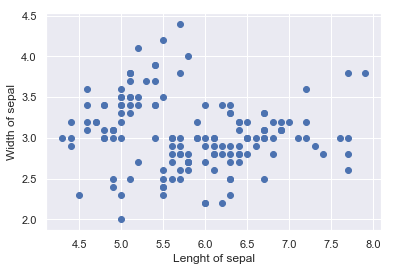

In [4]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

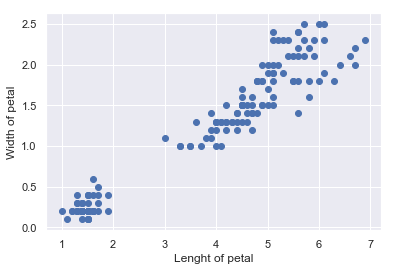

In [5]:
plt.scatter(iris['petal_length'],iris['petal_width'])
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')
plt.show()

### Clustering (unscaled data)

In [23]:
x = iris.copy()
kmeans1 = KMeans(2)
kmeans1.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'PETAL LENGTH / WIDTH')

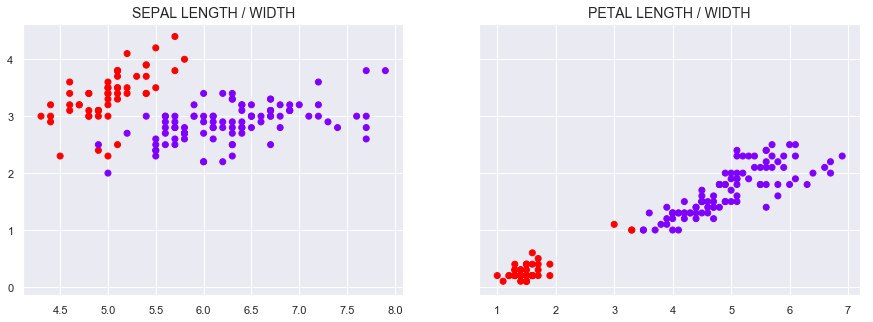

In [24]:
clusters = iris.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans1.fit_predict(x)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (15,5))

ax1.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
ax1.set_title('SEPAL LENGTH / WIDTH', fontsize=14)

ax2.scatter(clusters['petal_length'], clusters['petal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')
ax2.set_title('PETAL LENGTH / WIDTH', fontsize=14)

### Clustering (scaled data)
##### Standardize

In [29]:
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(iris)

In [30]:
x = iris.copy()
kmeans2_scaled = KMeans(2)
kmeans2_scaled.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'PETAL LENGTH / WIDTH')

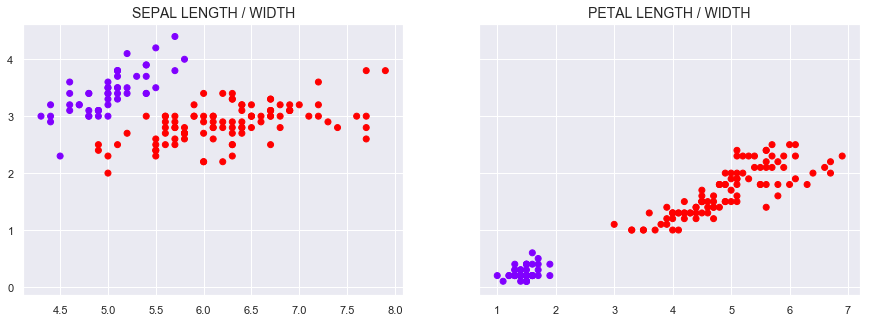

In [40]:
clusters2 = iris.copy()
# predict the cluster for each observation
clusters2['cluster_pred']=kmeans2_scaled.fit_predict(x_scaled)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (15,5))

ax1.scatter(clusters2['sepal_length'], clusters2['sepal_width'], c= clusters2['cluster_pred'], cmap = 'rainbow')
ax1.set_title('SEPAL LENGTH / WIDTH', fontsize=14)

ax2.scatter(clusters2['petal_length'], clusters2['petal_width'], c= clusters2['cluster_pred'], cmap = 'rainbow')
ax2.set_title('PETAL LENGTH / WIDTH', fontsize=14)

Looks like the two solutions are almost identical. That is because the original features have very similar scales to start with!

### The Elbow Method

In [33]:
wcss = []

for i in range (1,10):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

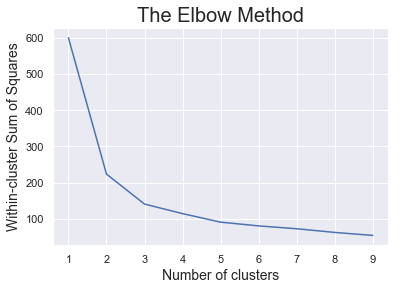

In [38]:
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method',fontsize =20)
plt.xlabel('Number of clusters', fontsize =14)
plt.ylabel('Within-cluster Sum of Squares', fontsize =14)
plt.show()

### Understanding the Elbow Curve
We will now construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, __2, 3 or 5__ seem the most likely.

In [42]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [44]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
clusters = x.copy()
clusters['cluster_pred_2']=kmeans_2.fit_predict(x_scaled)
clusters['cluster_pred_3']=kmeans_3.fit_predict(x_scaled)
clusters['cluster_pred_5']=kmeans_5.fit_predict(x_scaled)

Text(0.5, 1.0, 'PETAL // 5 clusters')

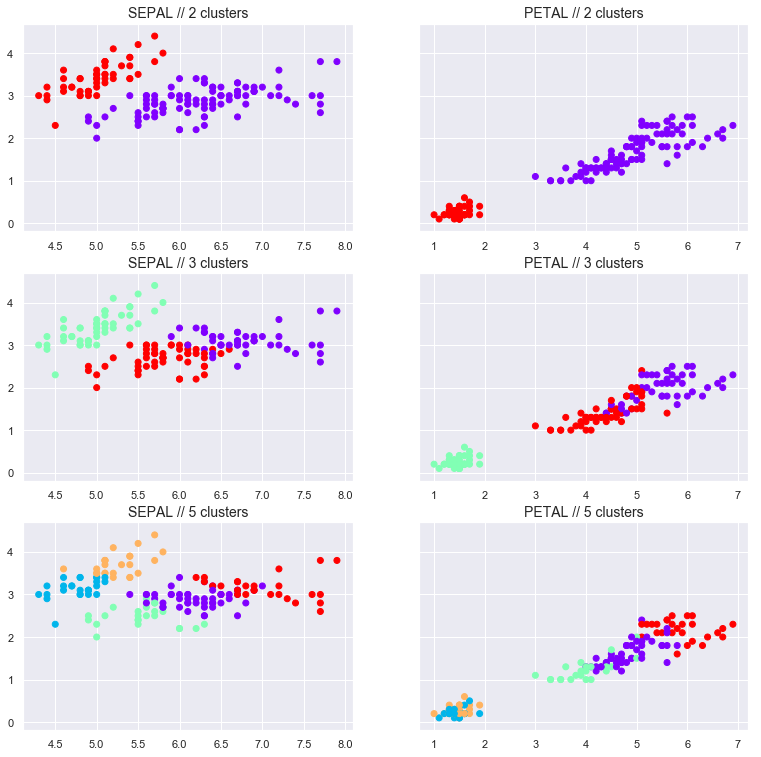

In [51]:
# Remember that we are plotting the non-standardized values of the sepal length and width.

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey=True, figsize= (13,13))

ax1.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters['cluster_pred_2'], cmap = 'rainbow')
ax1.set_title('SEPAL // 2 clusters', fontsize=14)

ax2.scatter(clusters['petal_length'], clusters_2['petal_width'], c= clusters['cluster_pred_2'], cmap = 'rainbow')
ax2.set_title('PETAL // 2 clusters', fontsize=14)

ax3.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters['cluster_pred_3'], cmap = 'rainbow')
ax3.set_title('SEPAL // 3 clusters', fontsize=14)

ax4.scatter(clusters['petal_length'], clusters['petal_width'], c= clusters['cluster_pred_3'], cmap = 'rainbow')
ax4.set_title('PETAL // 3 clusters', fontsize=14)

ax5.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters['cluster_pred_5'], cmap = 'rainbow')
ax5.set_title('SEPAL // 5 clusters', fontsize=14)

ax6.scatter(clusters['petal_length'], clusters['petal_width'], c= clusters['cluster_pred_5'], cmap = 'rainbow')
ax6.set_title('PETAL // 5 clusters', fontsize=14)

## Comparing the solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Now we will check if the KMeans predicted correctly.

Obviously there are only 3 species of Iris, because that's the original iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [70]:
real_data = pd.read_csv('iris-with-answers.csv')
real_data.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [72]:
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [73]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Scatter plots for comparison

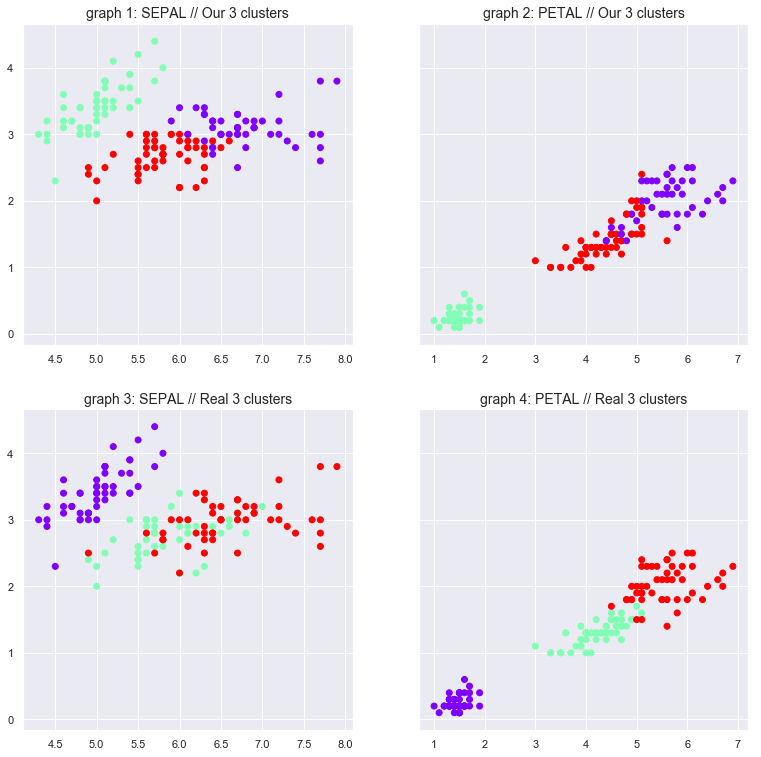

In [76]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize= (13,13))

ax1.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters['cluster_pred_3'], cmap = 'rainbow')
ax1.set_title('graph 1: SEPAL // Our 3 clusters', fontsize=14)

ax2.scatter(clusters['petal_length'], clusters_2['petal_width'], c= clusters['cluster_pred_3'], cmap = 'rainbow')
ax2.set_title('graph 2: PETAL // Our 3 clusters', fontsize=14)

ax3.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data['species'], cmap = 'rainbow')
ax3.set_title('graph 3: SEPAL // Real 3 clusters', fontsize=14)

ax4.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')
ax4.set_title('graph 4: PETAL // Real 3 clusters', fontsize=14)
plt.show()

Looking at the __graph 3__ it seems like the clustering solution is much more intertwined than our clustering in __graph 1__.

Examining the __graph 4__ (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

According to __graph 1__ and __graph 2__, ,it seems that our solution takes into account mainly the sepal features, instead of the petals.

### Further clarifications

In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.

This shows us that:
<li> the __Eblow method__ is imperfect (we might have opted for 2 or even 4) </li>
<li> k-means is very useful in moments where we already know the number of clusters - in this case: 3 </li>
<li> biology cannot be always quantified with k-means. Other methods are much better at that. </li>

Finally, you can try to __classify__ them (instead of cluster them).